In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

In [ ]:
def nd1(s,k,r,sigma,t):
  x1=np.log(s/k)+(r+(sigma*sigma)/2)*t;
  x2=sigma*np.sqrt(t)
  x=norm.cdf(x1/x2)
  return round(x,3)

In [ ]:
sp=pd.read_csv('data.csv')
stock_price=sp['Stock price($)']

k=50 # Strike Price
s0=49.00 # Initial Stock Price
r=0.05 # Interest Rate
sigma=0.2 
options=100000
T=20
delta=[]
t=T
for i in stock_price:
  delta.append(nd1(i,k,r,sigma,t/52))
  t-=1

bought_shares=[]
shares=0
for i in delta:
  bought_shares.append((i-shares)*options)
  shares=i

cost_purch=[]
for i in range(len(stock_price)):
  cost_purch.append(bought_shares[i]*stock_price[i])

prev=0
cumu_cost=[]
for i in range(len(cost_purch)):
  temp=prev*(1+r/52)
  temp+=cost_purch[i]
  cumu_cost.append(temp)
  prev=cumu_cost[-1]

interest_cost=[]
for i in cumu_cost:
  x=i*r/52
  interest_cost.append(x)
interest_cost[-1]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [ ]:
df = pd.DataFrame(columns=['Stock price','Delta','Shares Purchased','Cost of shares Purchased ','Cumulative Cost including interest','Interest cost'])
i = int(0)
for j in range(len(stock_price)):
  df.loc[i] = [stock_price[i],delta[i],bought_shares[i],cost_purch[i],cumu_cost[i],interest_cost[i]]
  i = i+1

df

,Stock price,Delta,Shares Purchased,Cost of shares Purchased,Cumulative Cost including interest,Interest cost
0,49.00,0.522,52200.0,2557800.0,2.557800e+06,2459.423077
1,48.12,0.458,-6400.0,-307968.0,2.252291e+06,2165.664830
2,47.37,0.400,-5800.0,-274746.0,1.979711e+06,1903.568354
3,50.25,0.596,19600.0,984900.0,2.966515e+06,2852.417939
4,51.75,0.693,9700.0,501975.0,3.471342e+06,3337.828917
5,53.12,0.774,8100.0,430272.0,3.904952e+06,3754.761445
6,53.00,0.771,-300.0,-15900.0,3.892807e+06,3743.083331
7,51.87,0.706,-6500.0,-337155.0,3.559395e+06,3422.494950
8,51.38,0.674,-3200.0,-164416.0,3.398401e+06,3267.693503
9,53.00,0.787,11300.0,598900.0,4.000569e+06,3846.700900


Text(0, 0.5, 'Delta value')

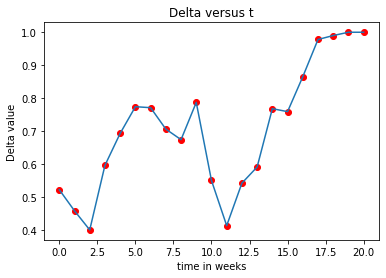

In [ ]:
t=np.arange(0,T+1,1)
for i in range(len(delta)):
  plt.plot(t[i],delta[i],'ro')
plt.plot(t,delta)
plt.title('Delta vs t')
plt.xlabel('t (in weeks)')
plt.ylabel('Value of Delta')

In [ ]:
if stock_price[T]>=k:
  print('Option will get exercised');
  print('Hedger will receive $',options_sold*k)
  x=cumulative_cost[-1]- options_sold*k
  print('Cost of writing the option and hedging is= $',x)
else:
  print('Option will not get exercised');
  x=cumulative_cost[-1]
  print('Cost of writing the option and hedging is= $',x)

Option will get exercised
Hedger will receive $ 5000000
Cost of writing the option and hedging is= $ 263305.4730421286
